<a href="https://colab.research.google.com/github/dsercam/TC033/blob/main/TC4033_Activity3a_IDGroup44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='darkorange'><b> TC 5033 :: Advanced Machine Learning Methods </b> </font>
### <font color='darkgray'><b> Activity 3a: Exploring Word Embeddings with GloVe and Numpy</b></font></br></br>
###<font color='darkblue'><b>  Group 44 </b></font>
***Dante Rodrigo Serna Camarillo A01182676***</br>
***Axel Alejandro Tlatoa Villavicencio A01363351***</br>
***Carlos Roberto Torres Ferguson A01215432***</br>
***Felipe de Jesús Gastélum Lizárraga A01114918***

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Import libraries
#import torch
#import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
from scipy import spatial
plt.style.use('ggplot')

### <font color="darkblue"> **1. Load files** </font>
>>Used three refrences to the glove embeddings, one for the 50, 100, 200 respectively </br>
>>> These different path references can be used to load the different embeddings depending on need and processing power</br>

>>Created the <font color="darkorange">***create_emb_dictionary***</font> function to load the files into python dictionaries </br>
>>> The only parameter is *path*, which refers to the path to our emebedding file</br>
</br>

In [ ]:
PATH200 = 'glove.6B.200d.txt' #200 dimensions
PATH100 = 'glove.6B.100d.txt' #100 dimensions
PATH50 = 'glove.6B.50d.txt'   #50 dimensions
emb_dim = 50

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
  #declare dictionary
    dictionary = {}
  #open file using given path
    with open(path, 'r') as f:
      for line in f: #for each line in file
        values = line.split() #split the line content
        word = values[0]      # the first value of the line is our word
        vector = np.asarray(values[1:], "float32") # create a vector for the embedding values
        dictionary[word] = vector #add entry to the dictonary, the word is the key and the vector is the value
    return dictionary #return the dictionary

### <font color="darkblue"> **1.1 Create the dictionary** </font>
>> We load the 50 dim embedding into our dictionary </br>

In [ ]:
# create dictionary
embeddings_dict50 = {}
embeddings_dict50 = create_emb_dictionary(PATH50) #use our function to load the file into the dictionary

### <font color="darkblue"> **1.2 See embedding samples** </font>
>>Created the <font color="darkorange">***show_n_frist_words***</font> function to load to print the embeddigns for given first <n> entries. </br>
>>> The first parameter is *path*, which refers to the path to our emebedding file</br>
>>> The second parameter is *n_words*, which refers to the number of lines we will read</br>
</br>

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

>> We want to see the first 5 samples, note how each value contains the 50 dims </br>

In [ ]:
show_n_first_words(PATH50, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### <font color="darkblue"> **2. Plotting embeddings** </font>

>>Created the <font color="darkorange">***plot_embeddings***</font> function to plot a set of given words, dimensions will be reduced to two dimensions -either using *PCA* or *tSNE*- in order to plot the words in a 2d scatter plot to appreaicate how close they are to each other. </br>
>>> * The first parameter is *words2show*, which is a list of the words we want to plot</br>
>>> * The second parameter is *embeddings_dict*, which is our embeddings dictionary</br>
>>> * The third parameter is *func*, which is the method to reduce dimensionality. Valid values are ***PCA*** and ***TSNE***, any other value will throw an error.</br>
</br>

In [ ]:
def plot_embeddings(words2show, embeddings_dict, func = PCA):
    #vector of embeddings for each one of the received words
    wordVectors = [embeddings_dict[word] for word in words2show]
    V = np.array(wordVectors) # to numpy array
    m ="" # used to change the marker type depending on the FUNC parameter
    plt.figure(figsize=(20,10)) #size of our plot

    if(func == PCA):
      pca = PCA() # init PCA object
      pca.fit(V) # fit and transform PCA
      Y = pca.transform(V)
      m = "X" # Use the X marker for the plot
      plt.title("PCA Decomposition")

    elif(func == TSNE):
      #num of componets as 2 for two dimensions, random_state seed for consistent results.
      tsne = TSNE(n_components=2, random_state=0)
      #fit the TSNE using our vector
      Y = tsne.fit_transform(V)
      m = "P" # Use the p marker for the plot
      plt.title("TSNE Decomposition")

    else: #non supported FUNC value
      print("FUNC[",func,"] NOT SUPPORTED. SUPPORTED VALUES ARE (PCA,tSNE)")
      pass

    #Plot an scatter plot to determine how close the words are.
    plt.scatter(Y[:, 0], Y[:, 1],marker=m, s=120)
    for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
      plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points") #annotate using our words
    plt.show() #show the plot


>> Our list of words that should have some proximity </br>

In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', #food
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china', #countries
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea', #drinks
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry', #fruits
            'school', 'work', 'university', 'highschool'] #places


#### <font color="darkblue"> **2.1 Plot PCA-reduced** </font>


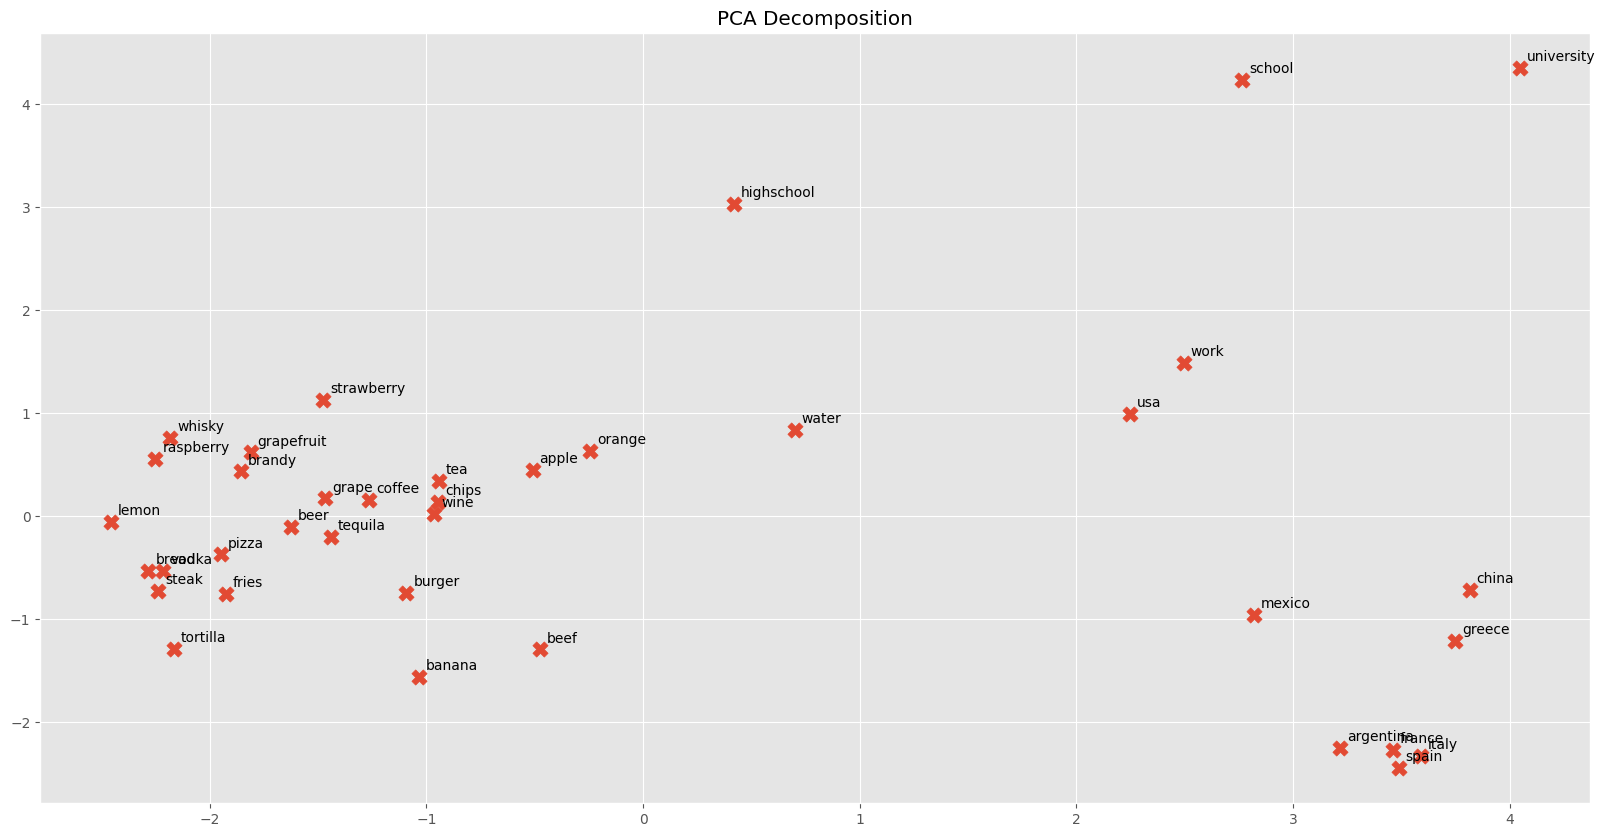

In [ ]:
plot_embeddings(words, embeddings_dict50, PCA)

#### <font color="darkblue"> **2.1 Plot TSNE-reduced** </font>


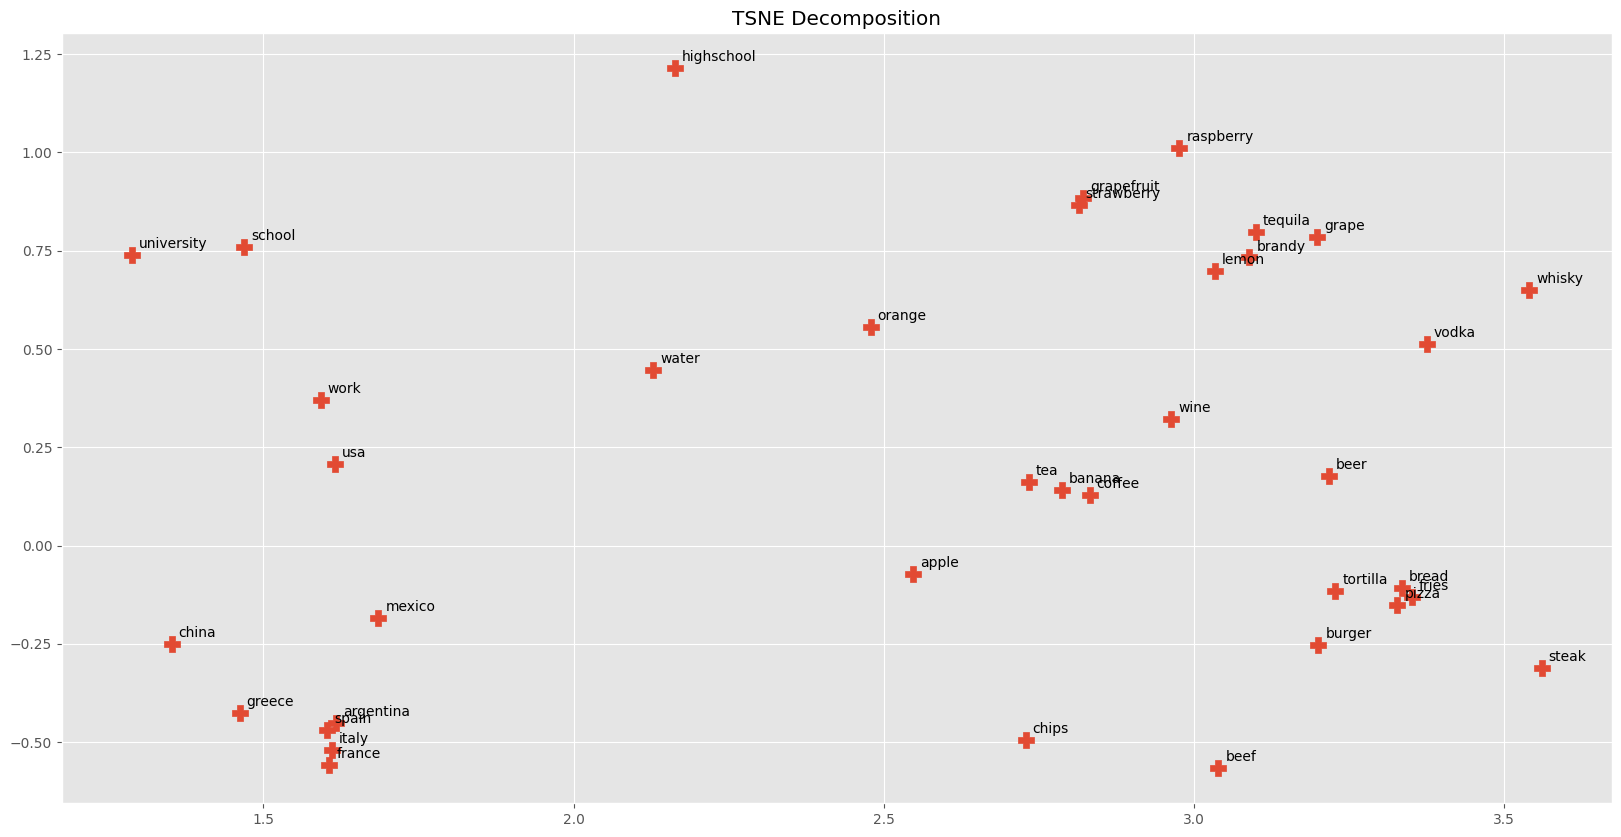

In [ ]:
plot_embeddings(words, embeddings_dict50, TSNE)

### <font color="darkblue"> **3. Analogies** </font>

>>Created the <font color="darkorange">***analogy***</font> function to find out the word that best completes an analogy of the form:</br></br>
>>>  "a is to b as c is to __" -> $e_b - e_a$ and $e_d - e_c$</br></br>
>> we will calcualte the cosine similarity between vectors to determine the best match for the analogy.</br></br>
>>> ${Cosine Similarity(u, v)} = \\frac {u . v} {||u||_2 ||v||_2} = cos(\\theta) $$",</br></br>


>>> * The first and second parameters *word1, word2*, refer to the values of the left side of our analogy (base)</br>
>>> * The third parameter is *word3*, which is the word we want to find the matching analogy</br>
>>> * The fourth parameter is *embeddings_dict*, which is our embeddings dictionary</br>
>>> * The fifth parameter is *debug*, which would print some data to better undestand what is happening when value is set as *true*.</br>
</br>

In [ ]:
## TC 5033
def analogy(word1, word2, word3, embeddings_dict,debug=False):
    # convert all the words to lower case to prevent any errors, as the key of the embeddings are in lowercase
    w1_embeddings = embeddings_dict[word1.lower()]
    w2_embeddings = embeddings_dict[word2.lower()]
    w3_embeddings = embeddings_dict[word3.lower()]

    if(debug): #if debug, print embeddings
      print('WORD 1 :: \n',w1_embeddings,'\n SHAPE :: ',w1_embeddings.shape)
      print('WORD 2 :: \n',w2_embeddings,'\n SHAPE :: ',w1_embeddings.shape)
      print('WORD 3 :: \n',w3_embeddings,'\n SHAPE :: ',w1_embeddings.shape)

    vocabulary = embeddings_dict.keys() # get our keys from the dictionary
    if(debug):# if debug, print the size of our vocabulary.
      print('vocabulary size :: ',len(vocabulary))

    similarityHelper= -999 #helper variable with a large negative value, candidates will bubble up as the similarity factor increases
    best_word = None # at first we do not have any candidate for the analogy

    leftEmbedding = w2_embeddings - w1_embeddings #get the data that captures the meaning/relationship between these two words.
    if(debug):
      print('leftEmbedding :: ',leftEmbedding,'\n SHAPE :: ',w1_embeddings.shape)

    # iterate over our vocabualry
    for word in vocabulary:
        # ignore the words that were recevied in the parameters, as those would not be a valid analogy
        if word in [word1, word2, word3]:
            continue

        # calculate cosine similarity between the vectors u and v
        #u ->(word2 - word1)
        #v ->(word candidate- word3)
        rightEmbedding = embeddings_dict[word] - w3_embeddings #data that represents the relationship between the word being analyzed and our word 3

        #calculate similarity
        dotProduct =np.dot(leftEmbedding,rightEmbedding) #dot product between the two "meaning" vectors
        norm1 = np.sqrt(np.sum(leftEmbedding**2)) #l2 norm on left
        norm2 = np.sqrt(np.sum(rightEmbedding**2)) #l2 norm on right
        similarity = dotProduct/(norm1)/norm2 #resulting similarity

        if similarity > similarityHelper: #if we found higher similarity, keep track of such word.
            print('Found best candiadte :: ',word,'\n With Similarity :: ',similarity)
            similarityHelper = similarity
            best_word = word

    return best_word #return the word that had the greatest similarity.

>>>  Calculate analogy "mexico is mexican as spain is to __" successfully

In [ ]:
analogy('mexico', 'mexican', 'spain', embeddings_dict50)

Found best candiadte ::  the 
 With Similarity ::  0.094091594
Found best candiadte ::  and 
 With Similarity ::  0.13606516
Found best candiadte ::  a 
 With Similarity ::  0.24216548
Found best candiadte ::  who 
 With Similarity ::  0.30801818
Found best candiadte ::  foreign 
 With Similarity ::  0.31484687
Found best candiadte ::  french 
 With Similarity ::  0.4664038
Found best candiadte ::  italian 
 With Similarity ::  0.6481958
Found best candiadte ::  spanish 
 With Similarity ::  0.72662735


'spanish'

>>>  Calculate analogy "man is to king as woman is to __" successfully

In [ ]:
analogy('man', 'king', 'woman', embeddings_dict50)

Found best candiadte ::  the 
 With Similarity ::  0.44563103
Found best candiadte ::  . 
 With Similarity ::  0.4628453
Found best candiadte ::  of 
 With Similarity ::  0.5006541
Found best candiadte ::  during 
 With Similarity ::  0.5152469
Found best candiadte ::  may 
 With Similarity ::  0.5429094
Found best candiadte ::  later 
 With Similarity ::  0.5793415
Found best candiadte ::  family 
 With Similarity ::  0.63559675
Found best candiadte ::  father 
 With Similarity ::  0.64468366
Found best candiadte ::  son 
 With Similarity ::  0.6499478
Found best candiadte ::  ii 
 With Similarity ::  0.729213
Found best candiadte ::  prince 
 With Similarity ::  0.7744951
Found best candiadte ::  kingdom 
 With Similarity ::  0.788129
Found best candiadte ::  queen 
 With Similarity ::  0.83967716


'queen'

### <font color="darkblue"> **3. Analogies-comparison** </font>

>>Created the <font color="darkorange">***analogyV2***</font> function to find out the word that best completes an analogy, in this case we used spatial to calcualte the euclidean distance between the vectors. This comparison help us valdiate we are getting the same result with our own calculations.</br></br>

In [ ]:
# analogy
def analogyV2(word1, word2, word3, embeddings_dict):
  leftembedding = embeddings_dict[word2] - embeddings_dict[word1]
  analogies = sorted(embeddings_dict.keys(), key=lambda w: spatial.distance.euclidean(leftembedding,embeddings_dict[w]-embeddings_dict[word3]))[0:5]
  if word1 in analogies: analogies.remove(word1)
  if word2 in analogies: analogies.remove(word2)
  if word3 in analogies: analogies.remove(word3)
  return analogies[0:1]

In [ ]:
analogyV2('man', 'king', 'woman', embeddings_dict50)

['queen']

In [ ]:
analogyV2('man', 'king', 'woman', embeddings_dict50)

['queen']

### <font color="darkblue"> **4. Word similarity** </font>

>>Created the <font color="darkorange">***getSimilarity***</font> function to calcualte the cosine similarity between word embeddings. We are basically encapsualting the code we used before to create a fucntion that treturns the cosine simialrioty of two vectors</br></br>

>>> * The first parameter is *leftE*, refers to the embedding of our first word</br>
>>> * The second parameter is *rightE*, refers to the embedding of the second word</br>


In [ ]:
def getSimilarity(leftE, rightE):
  dotProduct =np.dot(leftE,rightE)
  norm1 = np.sqrt(np.sum(leftE**2))
  norm2 = np.sqrt(np.sum(rightE**2))
  return dotProduct/(norm1)/norm2


>>> * example of cosine similarity between *dog* and *cats* on our embeddings</br>

In [ ]:
getSimilarity(embeddings_dict50['dog'],embeddings_dict50['cats'])

0.7299786

### <font color="darkblue"> **4.1 Finding _N_ Words with most similarity to _X_** </font>

>>Created the <font color="darkorange">***find_most_similar***</font> function to get a list of the _n_ number of words that hold the most similarity to a given word.

>>> * The first parameter is *leftE*, refers to the word we want to use to find similar words</br>
>>> * The second parameter is *embeddings_dict*, references our embedding dictionary</br>
>>> * The third parameter is *top_n*, refers to the number of _similar_ words we want to get</br>

In [100]:
def find_most_similar(word, embeddings_dict, top_n=10):
    # convert word to lower case to prevent any issue
    w_embeddings = embeddings_dict[word.lower()]

    # create a dictionary to hold our partial values
    distanceDict = {}
    for w in embeddings_dict.keys(): #for each word on our dictonary
        distance = getSimilarity(embeddings_dict[w],w_embeddings) #calcualte the similarity between our given world and the iterating key
        distanceDict.update({w:distance}) # add to our similarities dictionary.

    return dict(sorted(distanceDict.items(), key=lambda item: item[1], reverse=True)[1:top_n]) # sort our dictionary and return the n greatest matches

In [101]:
find_most_similar('dogs', embeddings_dict50)


{'cats': 0.8516518,
 'dog': 0.8513158,
 'animals': 0.82346654,
 'rats': 0.7897114,
 'cat': 0.7795815,
 'pigs': 0.77540845,
 'animal': 0.75866634,
 'stray': 0.7551109,
 'horses': 0.753108}

In [102]:
find_most_similar('apple', embeddings_dict50)

{'blackberry': 0.75430673,
 'chips': 0.74386436,
 'iphone': 0.74296653,
 'microsoft': 0.73342055,
 'ipad': 0.7331037,
 'pc': 0.72172254,
 'ipod': 0.71997845,
 'intel': 0.71922445,
 'ibm': 0.7146541}

### <font color="darkblue"> **4. Similarities-comparison** </font>

>>Created the <font color="darkorange">***find_most_similarV2***</font> function to find if our results match the ones obtained if we use the spatial.distance.euclidean exisitng method instead of our own calcualtions.</br></br>
>> The words are the top tend to be consistent but some other are different, this is explained as the cosine similarity is different than the distance between vectors

In [106]:
# most similar
def find_most_similarV2(word, embeddings_dict, top_n=10):
    return sorted(embeddings_dict.keys(), key=lambda w: spatial.distance.euclidean(embeddings_dict[w],embeddings_dict[word]))[1:top_n+1]


In [108]:
print(find_most_similarV2('dogs', embeddings_dict50))

['cats', 'dog', 'cat', 'rats', 'stray', 'animals', 'pigs', 'pets', 'animal', 'spotted']


In [107]:
print(find_most_similarV2('apple', embeddings_dict50))

['blackberry', 'ipad', 'pc', 'iphone', 'chips', 'coke', 'ipod', 'dell', 'sells', 'cola']
